In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import json
import geopandas as gpd
import folium
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
from uszipcode import SearchEngine
import plotly.graph_objects as go

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [4]:
zip_to_county_df = pd.read_excel('../../data/ZIP_COUNTY_122019.xlsx', dtype={'ZIP': str, 'COUNTY': str})

In [5]:
zip_to_county_df = zip_to_county_df[['ZIP', 'COUNTY']]

In [6]:
resids_df=pd.read_csv('../../data/sarimax_resids_acs_bikeshare.csv', 
                      dtype={'Unnamed: 0': str}).rename(columns = {"Unnamed: 0":"zip"})

In [7]:
zipcodes = resids_df['zip'].unique()

In [8]:
resids_df['zip'].unique()

array(['01013', '01020', '01040', ..., '99504', '99508', '99654'],
      dtype=object)

In [9]:
resids_df['1'] = abs(resids_df['1'])

In [10]:
zip_county_merged = resids_df.merge(zip_to_county_df, how= 'left', left_on= "zip", right_on = "ZIP")

In [11]:
zip_county_merged

,zip,1,2,3,4,5,6,7,8,9,10,11,12,ZIP,COUNTY
0,01013,11.633060,15.338032,10.544682,5.986130,7.537468,-0.859763,-7.232922,-13.594816,-16.951438,-33.305591,-15.658590,-6.011048,01013,25013
1,01020,18.380454,19.575646,12.712027,12.829739,16.941525,8.051429,-2.839264,-9.730146,-13.621088,-33.512050,-24.403018,-15.293988,01020,25013
2,01040,4.450587,-18.023535,-21.728945,-19.110673,-14.371634,-21.587538,-26.786629,-33.979448,-37.169927,-51.359533,-22.548813,-8.737972,01040,25013
3,01085,8.532262,-10.462644,-12.632110,-6.945155,-9.344423,-11.795472,-10.277616,-4.778435,-0.290468,13.190765,18.167953,23.142713,01085,25013
4,01104,1.403165,4.631132,2.173358,4.898454,10.729964,12.623397,13.552864,16.503298,14.465934,-2.564329,-5.590461,-3.614189,01104,25013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,99207,6.209487,2.135230,-5.115621,-16.476377,-20.905536,-19.377266,-14.875492,-5.390207,8.084815,33.553449,21.018109,8.480294,99207,53063
1489,99501,24.914657,33.900916,42.266766,47.218023,42.892227,37.381286,31.746623,24.029280,12.256687,-23.552828,-30.387016,-37.237693,99501,02020
1490,99504,16.942494,16.447663,9.689540,2.772901,-5.239174,-9.308705,-11.412828,-10.537777,-15.675265,-32.820302,-52.969884,-35.122202,99504,02020
1491,99508,19.845321,21.077860,12.902484,5.455570,-6.172102,-16.920100,-24.748196,-34.629611,-42.546520,-55.487056,-59.443320,-61.410053,99508,02020


In [12]:
zip_county_mean = zip_county_merged.groupby('COUNTY').mean().reset_index()

In [11]:
zip_county_mean

,COUNTY,1,2,3,4,5,6,7,8,9,10,11,12
0,02020,20.567491,23.808813,21.619597,18.482164,10.493650,3.717494,-1.471467,-7.046036,-15.321699,-37.286729,-47.600073,-44.589983
1,02170,0.387552,-5.054502,-14.872011,-16.770650,-18.713006,-29.678921,-39.657531,-38.642981,-45.632117,-86.623240,-62.115433,-37.608203
2,04013,10.788023,-2.803639,5.559874,10.759912,11.986409,9.411676,5.642690,4.570770,6.435576,1.062798,3.600587,7.078912
3,04019,2.980677,-2.598912,0.805604,3.951473,7.380216,9.340853,10.775837,10.978713,12.254956,11.251490,13.954174,7.352776
4,04025,10.076217,12.832488,20.462746,25.546480,30.364952,36.054676,43.681911,44.278815,33.860999,14.436038,1.007609,-2.422503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,55063,2.808346,-4.360088,1.128534,8.623505,7.119475,0.615602,6.111754,9.607910,2.104066,15.600222,-1.903621,-1.407465
283,55071,11.243113,-25.608477,-12.939140,-3.506859,4.146758,11.310245,20.165219,36.826001,49.364548,55.826155,64.239332,59.622024
284,55079,8.571951,8.054789,13.071468,19.899799,27.035829,31.418370,36.087152,27.094120,17.756795,3.884960,-7.950235,-10.535560
285,55101,5.376974,-14.333438,0.662693,20.845921,43.738965,64.713828,82.035252,82.891645,72.417091,55.707013,38.829320,35.832341


In [13]:
counties_listed = zip_county_mean['COUNTY'].unique()

In [14]:
output_dict = [x for x in counties['features'] if x['id'] in counties_listed]
counties['features'] = output_dict
counties_json = json.dumps(counties)

In [71]:
# gdp_df=pd.read_csv('../data/GDP_byZip.csv')
# taxes_df=pd.read_csv('../data/final_TAXES_by_zip.csv', dtype={'ZIPCODE': str})
# shapes = gpd.read_file("../data/cb_2013_us_zcta510_500k/cb_2013_us_zcta510_500k.shp")
# # geo_shapes = json.loads("../data/cb_2013_us_zcta510_500k/cb_2013_us_zcta510_500k.json")

# with open("../data/cb_2013_us_zcta510_500k/cb_2013_us_zcta510_500k.json") as f:
#     geo_shapes = geojson.load(f)

In [16]:
shapes = shapes.loc[shapes['GEOID10'].isin(zipcodes)]

NameError: name 'shapes' is not defined

In [ ]:
shapes_cleaned = shapes.to_crs(epsg=4326)
shapes_cleaned.to_file("../data/zip_GeoJSON.json", driver = "GeoJSON")
with open("../data/zip_GeoJSON.json") as geofile:
    geoj_file = json.load(geofile)

In [18]:
# Join = shapes.merge(taxes_df, left_on="GEOID10", right_on="ZIPCODE")

In [17]:
main = Join.dropna()
main = main[(main['year'] == 2018) & (main['month'] == 1)]
main['state_local_perc'] = main['state_local_perc']*100


NameError: name 'Join' is not defined

In [21]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})

# import plotly.express as px

# fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            scope="usa",
#                            labels={'unemp':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [145]:
df = taxes_df[(taxes_df['year'] == 2018) & (taxes_df['month'] == 1)]
fig = px.choropleth(df, geojson=geoj_file, locations='ZIPCODE', color='state_local_perc',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'state_local_perc':'state and local tax rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [278]:
# url = (
#     "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
# )
# state_geo = f"{url}/us-states.json"
# state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
# state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3,
               tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/tile/{z}/{y}/{x}',
               attr= 'Tiles &copy; Esri &mdash; Source: US National Park Service')


# 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/tile/{z}/{y}/{x}', {
# 	attribution: 'Tiles &copy; Esri &mdash; Source: US National Park Service',
# 	maxZoom: 8

folium.Choropleth(
    geo_data=geoj_file,
    name="Zipcodes",
    data=resids_df,
    columns=["zip", "1"],
    key_on="feature.properties.GEOID10",
    fill_color="BuPu",
#     bins=[0, 10, 15, 20, 25, 30, 35, 45],
    fill_opacity=1,
#     line_opacity=0.00001,
    line_weight = 0.3,
    legend_name="Playing around",
    highlight=True,
).add_to(m)

folium.LayerControl().add_to(m)

m

In [277]:
# url = (
#     "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
# )
# state_geo = f"{url}/us-states.json"
# state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
# state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3, tiles = "Stamen Terrain")

folium.Choropleth(
    geo_data=counties,
    name="Counties",
    data=zip_county_mean_test,
    columns=["COUNTY", "1"],
    key_on="feature.id",
    fill_color="BuPu",
#     bins=[0, 10, 15, 20, 25, 30, 35, 45],
    fill_opacity=.5,
#     line_opacity=0.00001,
    line_weight = 0.3,
    legend_name="Playing around",
    highlight=True,
).add_to(m)

folium.LayerControl().add_to(m)

m

In [20]:
with open("../../data/georef-united-states-of-america-zc-point.geojson") as geofile:
    zips_geoj_file = json.load(geofile)

In [21]:
zips_geo_df = pd.read_csv('../../data/georef-united-states-of-america-zc-point.csv',
                          sep=';', dtype={'Zip Code': str})

In [22]:
zips_geo_df['Zip Code'] = zips_geo_df['Zip Code'].map(lambda x: '0' + x if len(x) < 5 else x)

In [23]:

zips_geo_df = zips_geo_df.loc[zips_geo_df['Zip Code'].isin(zipcodes)]
zips_geo_df['Zip Code'].nunique()

1301

In [24]:
zips_geo_df

,Zip Code,Official USPS city name,Official USPS State Code,Official State Name,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,Primary Official County Name,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
15,32224,Jacksonville,FL,Florida,True,NaN,44058.0,803.8,12031,Duval,"{""12031"": ""99.89"", ""12109"": ""0.11""}",Duval|St. Johns,12031|12109,False,False,America/New_York,"30.27027,-81.46796"
32,33634,Tampa,FL,Florida,True,NaN,22719.0,1069.3,12057,Hillsborough,"{""12057"": ""100""}",Hillsborough,12057,False,False,America/New_York,"28.00884,-82.54618"
38,34698,Dunedin,FL,Florida,True,NaN,38720.0,1463.7,12103,Pinellas,"{""12103"": ""100""}",Pinellas,12103,False,False,America/New_York,"28.03399,-82.77961"
136,43204,Columbus,OH,Ohio,True,NaN,42796.0,1837.5,39049,Franklin,"{""39049"": ""100""}",Franklin,39049,False,False,America/New_York,"39.96136,-83.0816"
191,46203,Indianapolis,IN,Indiana,True,NaN,38581.0,1076.1,18097,Marion,"{""18097"": ""100""}",Marion,18097,False,False,America/Indiana/Indianapolis,"39.73761,-86.0969"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33000,22204,Arlington,VA,Virginia,True,NaN,54617.0,5117.9,51013,Arlington,"{""51013"": ""100""}",Arlington,51013,False,False,America/New_York,"38.86083,-77.09894"
33010,23602,Newport News,VA,Virginia,True,NaN,38821.0,1117.9,51700,Newport News,"{""51700"": ""99.76"", ""51199"": ""0.24""}",Newport News|York,51700|51199,False,False,America/New_York,"37.1148,-76.51582"
33057,27705,Durham,NC,North Carolina,True,NaN,49508.0,436.5,37063,Durham,"{""37063"": ""90.43"", ""37135"": ""9.57""}",Durham|Orange,37063|37135,False,False,America/New_York,"36.02698,-78.98065"
33098,30308,Atlanta,GA,Georgia,True,NaN,18839.0,4561.5,13121,Fulton,"{""13121"": ""100""}",Fulton,13121,False,False,America/New_York,"33.77121,-84.3781"


In [25]:
zips_geo_df[['Latitude','Longitude']] = zips_geo_df['Geo Point'].str.split(',',expand=True)

In [26]:
output_dict = [x for x in counties['features'] if x['zip_code'] in counties_listed]
counties['features'] = output_dict
counties_json = json.dumps(counties)

KeyError: 'zip_code'

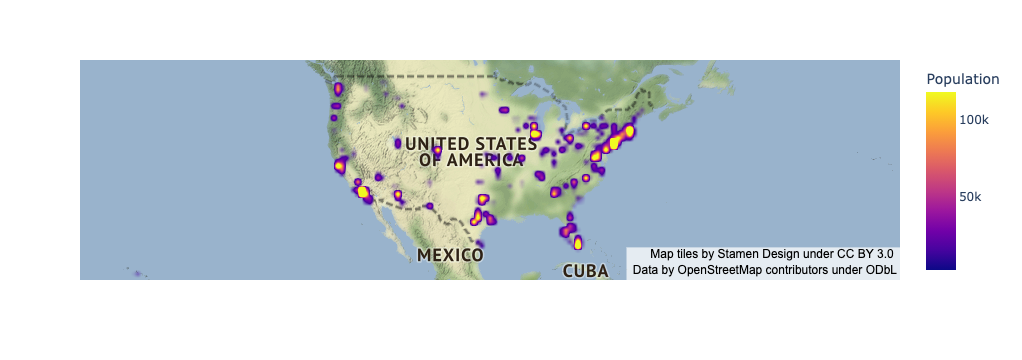

In [35]:
fig = px.density_mapbox(zips_geo_df, lat='Latitude', lon='Longitude', z='Population', radius=4,
                        center=dict(lat=37.0902, lon=-95.7129), zoom=2,
                        mapbox_style="stamen-terrain")
fig.show()

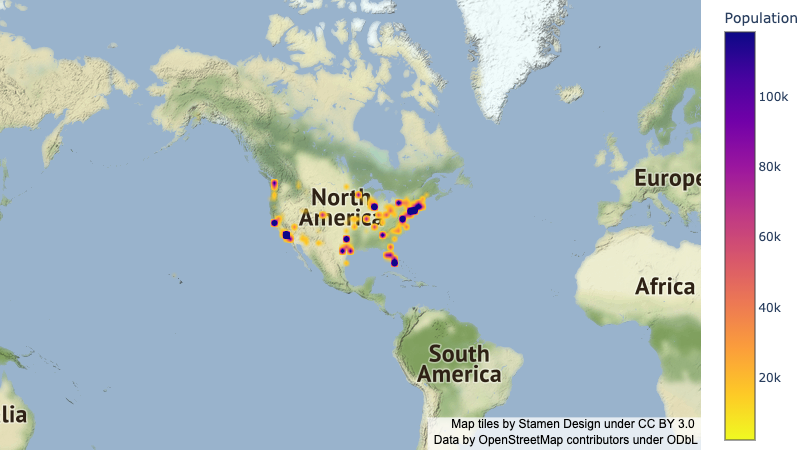

In [60]:
fig = go.Figure(go.Densitymapbox(lat=zips_geo_df.Latitude, 
                                 lon=zips_geo_df.Longitude, 
                                 z=zips_geo_df.Population,
                                 radius=3))
fig.update_layout(mapbox_style="stamen-terrain", 
                  mapbox_center_lat= 37.0902, 
                  mapbox_center_lon=-95.7129)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                 width=800, height=450)
fig.update_traces(colorbar_title_text="Population", 
                  selector=dict(type='densitymapbox'))
fig.update_traces(reversescale=True, 
                  selector=dict(type='densitymapbox'))
fig.show()

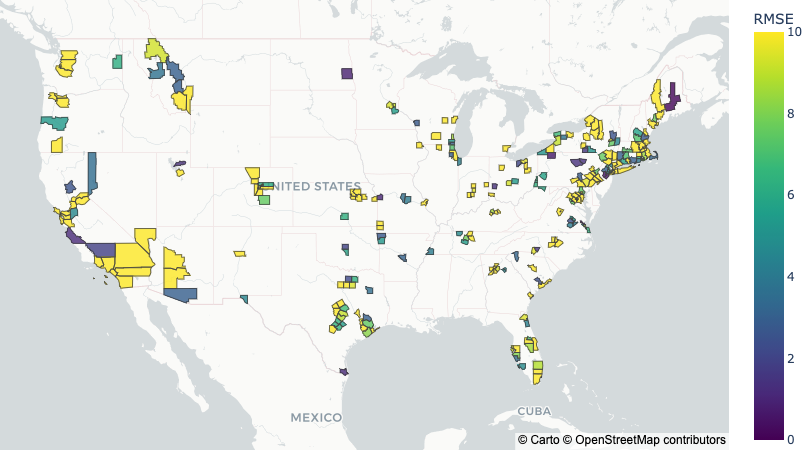

In [58]:
fig = px.choropleth_mapbox(zip_county_mean, geojson=counties, locations='COUNTY', color='1',
                           color_continuous_scale="Viridis",
                           range_color=(0, 10),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.8,
                           labels={'1':'RMSE'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                 width=800, height=450)
fig.show()



# folium.Choropleth(
#     geo_data=counties,
#     name="Counties",
#     data=zip_county_mean_test,
#     columns=["COUNTY", "1"],
#     key_on="feature.id",
#     fill_color="BuPu",
# #     bins=[0, 10, 15, 20, 25, 30, 35, 45],
#     fill_opacity=.5,
# #     line_opacity=0.00001,
#     line_weight = 0.3,
#     legend_name="Playing around",
#     highlight=True,
# ).add_to(m)

# folium.LayerControl().add_to(m)

# m